# EDA

Most common words - find these and create word clouds.

Size of vocabulary - look number of unique words.

Amount of profanity - most common terms

In [40]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm1.pkl')
data = data.transpose()
data.head()

,Deepak Ravishankar Ramkumar,Karthik Kottiswaran,Karthikeyan Narayanaswami,Krishna Kumar,Raj Kumar,Raj Kumar S,Ram,Ram Balaji Subbaiyan,Riyas Khan,Selva Vignesh
aache,1,0,0,0,0,0,0,0,0,0
aaga,0,1,0,0,0,0,0,0,0,0
aagura,1,0,0,0,0,0,0,0,0,0
aaguthu,0,0,0,1,0,0,0,0,0,0
aahirum,0,0,0,0,0,0,0,0,1,0


In [41]:
# find top 30 words by each member
top_dict = {}

for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
top_dict

{'Deepak Ravishankar Ramkumar': [('think', 7),
  ('image', 7),
  ('nanba', 5),
  ('group', 5),
  ('kid', 5),
  ('oru', 5),
  ('did', 5),
  ('gif', 5),
  ('love', 4),
  ('time', 4),
  ('al', 4),
  ('hw', 4),
  ('know', 4),
  ('eduku', 4),
  ('theriyum', 4),
  ('ppl', 3),
  ('avan', 3),
  ('ne', 3),
  ('iruka', 3),
  ('naal', 3),
  ('feel', 3),
  ('ya', 3),
  ('dont', 3),
  ('pain', 3),
  ('nu', 3),
  ('ila', 3),
  ('inda', 3),
  ('lik', 3),
  ('like', 3),
  ('yarunu', 3)],
 'Karthik Kottiswaran': [('watha', 4),
  ('life', 3),
  ('time', 3),
  ('yenna', 2),
  ('mathiri', 2),
  ('phone', 2),
  ('movie', 2),
  ('movies', 2),
  ('varaikum', 2),
  ('way', 2),
  ('years', 2),
  ('vijay', 2),
  ('typing', 2),
  ('people', 2),
  ('nee', 2),
  ('day', 2),
  ('machi', 2),
  ('group', 2),
  ('nu', 2),
  ('used', 2),
  ('yennaku', 2),
  ('oru', 1),
  ('irukanu', 1),
  ('thala', 1),
  ('thaliya', 1),
  ('open', 1),
  ('theri', 1),
  ('irukan', 1),
  ('therium', 1),
  ('theriuthu', 1)],
 'Karthikeyan

In [42]:
additional_stop_words = ['lam', 'da', 'tat', 'thats', 'na', 'adhu', 'll', 'dai', 'ur', 'im', 
                         'ithu', 've', 'la', 'ah', 'omitted', 'ku', 'oda', 'dhan', 'va', 'erukku', 'like'
                         'nu', 'don','nee' 'unnaku', 'unaku', 'enaku', 'dan', 'appo', 'intha', 'indha','ok','okay']

In [43]:
# Re-clean, find top most_common words 
from collections import Counter

words = []
for member in data.columns:
    top = [word for (word, count) in top_dict[member]]
    for t in top:
        words.append(t)
        
# Counter(words).most_common()

In [44]:
# Update the document term matrix with new set of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Read the clean data
clean_data1 = pd.read_pickle('data_clean1.pkl')

# add new stop words
stop_words2 = text.ENGLISH_STOP_WORDS.union(additional_stop_words)

# recreate Document term matrix
cv = CountVectorizer(stop_words=stop_words2)
data_cv = cv.fit_transform(clean_data1.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = clean_data1.index

#pickle it for later use
import pickle
pickle.dump(cv, open('data_clean2.pkl', 'wb'))
data_stop.to_pickle('dtm_stop1.pkl')

In [45]:
# stop_words2

In [46]:
# Create word cloud and see whats in there
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words2, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

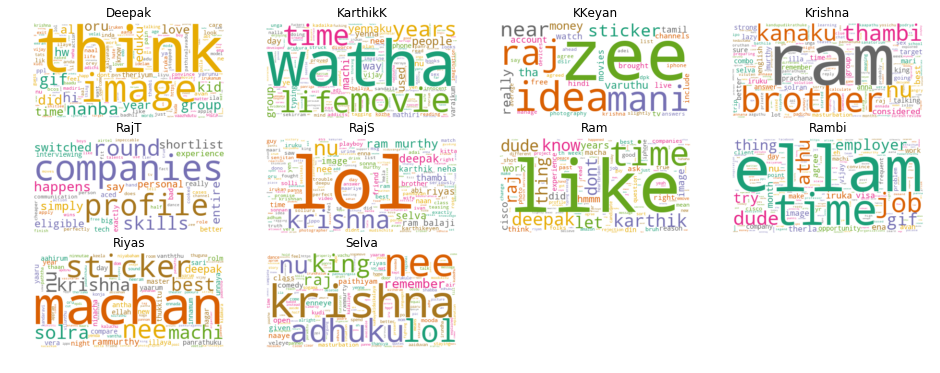

In [47]:
# Plot the same.
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]
full_names = ['Deepak', 'KarthikK', 'KKeyan', 'Krishna', 'RajT', 'RajS',
              'Ram', 'Rambi', 'Riyas', 'Selva']

for index, member in enumerate(data.columns):
    wc.generate(clean_data1.transcript[member])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

# Number of words by each member

In [48]:
unique_list = []

for member in data.columns:
    uniques = data[member].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns= ['member', 'unique_words'])
unique_data = data_words.sort_values(by='unique_words')
unique_data

,member,unique_words
2,KKeyan,37
4,RajT,53
8,Riyas,99
9,Selva,169
1,KarthikK,202
3,Krishna,213
7,Rambi,381
5,RajS,410
0,Deepak,502
6,Ram,587


In [49]:
# Number of profanity
swearing = ['fuck', 'shit', 'fucking', 'watha', 'otha', 'arse', 'sex', 'masturbation', 'fucker']
swear_data = data.transpose()[swearing]
swear_dataframe = pd.concat([swear_data.fuck +  swear_data.fucking, swear_data.shit], axis=1)
swear_dataframe.columns = ['f_word', 's_word']
swear_dataframe

,f_word,s_word
Deepak Ravishankar Ramkumar,1,0
Karthik Kottiswaran,1,0
Karthikeyan Narayanaswami,0,0
Krishna Kumar,0,1
Raj Kumar,0,0
Raj Kumar S,0,0
Ram,3,0
Ram Balaji Subbaiyan,1,0
Riyas Khan,0,0
Selva Vignesh,0,0
